**Linear Regression Assignment**
Create a Linear regression model to predict the salary of an employee given how many years of experience they have. Below tasks with proper explanation for each step needs to be submitted:

Environment Set Up (Load required libraries)


*   Data Acquisition
*   Data Wrangling
*   EDA (Exploratory Data Analysis) - Plots, Graphs
*   Model Building
*   Model Evaluation
*   Summary and Conclusion








### Data Acquisition 

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/employee_salary_data.csv')

In [ ]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


**EDA (Exploratory Data Analysis) - Plots, Graphs**

In [ ]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
avgyrs = data['YearsExperience'].mean()
avgsal = data['Salary'].mean()
print ("Average Year of Experience is: " + str(avgyrs)+ "\nAverage Salary is: "+ str(avgsal))

Average Year of Experience is: 5.3133333333333335
Average Salary is: 76003.0


In [ ]:
medyrs = data['YearsExperience'].median()
medsal = data['Salary'].median()
print ("Median Year of Experience is: " + str(medyrs)+ "\nMedian Salary is: "+ str(medsal))

Median Year of Experience is: 4.7
Median Salary is: 65237.0


The average years of experiance is 5 years 4 months.
The average Salary is 76,000.

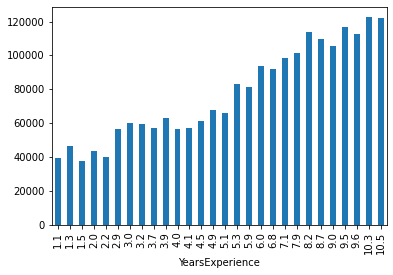

In [ ]:
data.groupby(['YearsExperience'])['Salary'].mean().plot(kind = 'bar')

Above chart clearly indicates that the more years an employee has, the higher the salary.

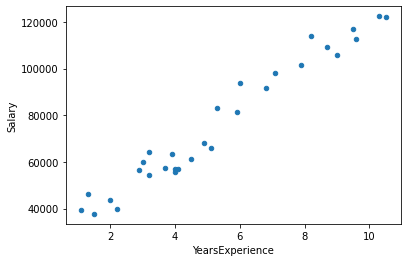

In [ ]:
#How about the salary weights
data.plot(kind = "scatter", x='YearsExperience', y='Salary')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


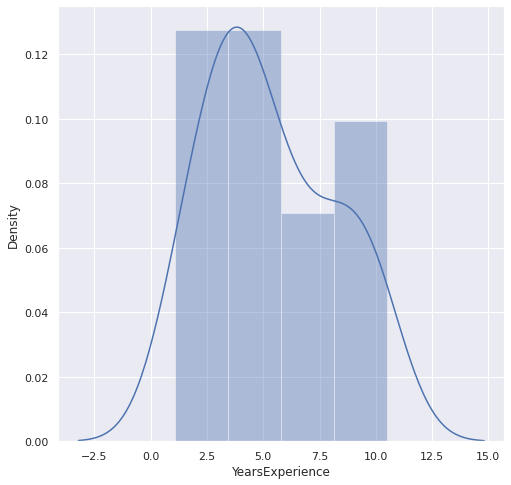

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
sns.distplot(data['YearsExperience'])
plt.show()

Above chart clearly indicates that the majority of employees have working experience between 1 and 5 years.

**Model Building**

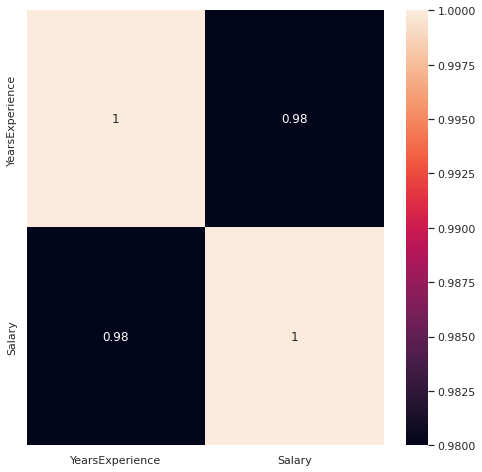

In [ ]:
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

There is a strong correlation between years of experience and salary. A near perfect linear relationship exist. This confirms the output of the scatter plot. We will use the model to verify this observation.

In [ ]:
data2 = data.rename(columns={'YearsExperience' : 'YrsExp'})
data2.columns

Index(['YrsExp', 'Salary'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data2[['YrsExp']]#create a new dataframe called X 

In [ ]:
X.shape
X.head()

,YrsExp
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [ ]:
Y = data2[['Salary']]#create a new dataframe called X 

In [ ]:
Y.shape
Y.head()

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0


In [ ]:
#Split the data into train and text
x_train, x_test, y_train, y_test = train_test_split(X,Y)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linReg = LinearRegression()

In [ ]:
linReg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(linReg.intercept_)

[24510.53231474]


In [ ]:
y_pred = linReg.predict(x_test)

In [ ]:
#Let's Evaluate our Model
from sklearn import metrics 

In [ ]:
r2 = metrics.r2_score(y_test,y_pred)

In [ ]:
r2

0.9417086939108357

0.94 is near 1 which clearly indicates and near accurate model.

**Model Evaluation**

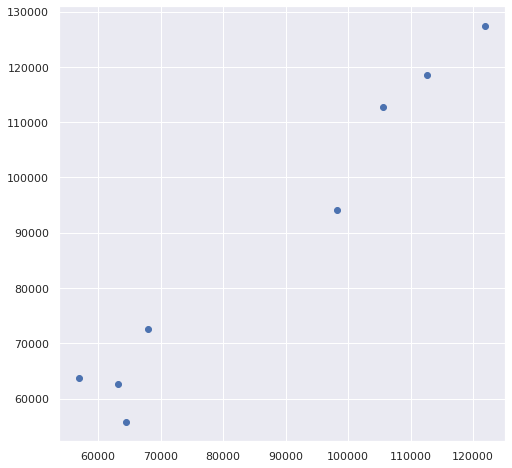

In [ ]:
plt.scatter(y_test,y_pred)

# **The scatter plot (used mainly for linear regression) does depict a true observation that the model is near accurate since the test values and the predicted values yield a linear corelation.**

In [ ]:
data2.corr()

,YrsExp,Salary
YrsExp,1.000000,0.978242
Salary,0.978242,1.000000


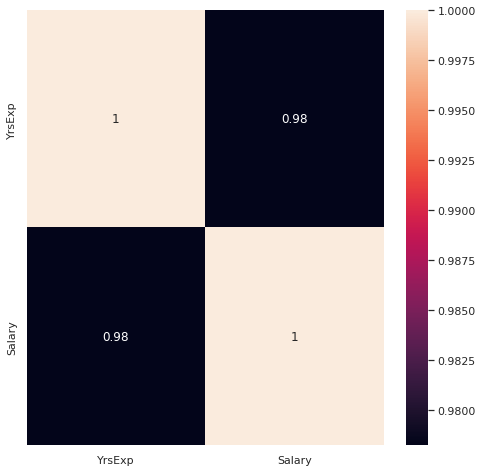

In [ ]:
sns.heatmap(data2.corr(),annot=True)

**The heatmap does show a strong correlation between Years of Experience and Salary**